In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
def model(X,W,b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [8]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

In [9]:
def gradient(X,W,b,y):
    N=len(y)

    y_pred = model(X,W,b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
LEARNING_RATE = 0.001

In [11]:
%%timeit -n 1 -r 1
global W, b

# Project 1 Result

losses = []

# LEARNING_RATE = 0.001에서는 Iteration 280000 에서 3000보다 낮아짐. 
# LEARNING_RATE 가 높으면 explod 위험 torch나 tf에서는 기본값으로 1e^-5 정도를 줌
for i in range(1,1000001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 5381.1368
Iteration 20000 : Loss 4878.3651
Iteration 30000 : Loss 4504.4706
Iteration 40000 : Loss 4222.7346
Iteration 50000 : Loss 4007.3176
Iteration 60000 : Loss 3839.9919
Iteration 70000 : Loss 3707.8597
Iteration 80000 : Loss 3601.7598
Iteration 90000 : Loss 3515.1541
Iteration 100000 : Loss 3443.3491
Iteration 110000 : Loss 3382.9517
Iteration 120000 : Loss 3331.4881
Iteration 130000 : Loss 3287.1363
Iteration 140000 : Loss 3248.5391
Iteration 150000 : Loss 3214.6719
Iteration 160000 : Loss 3184.7502
Iteration 170000 : Loss 3158.1642
Iteration 180000 : Loss 3134.4316
Iteration 190000 : Loss 3113.1656
Iteration 200000 : Loss 3094.0502
Iteration 210000 : Loss 3076.8241
Iteration 220000 : Loss 3061.2677
Iteration 230000 : Loss 3047.1946
Iteration 240000 : Loss 3034.4445
Iteration 250000 : Loss 3022.8784
Iteration 260000 : Loss 3012.3748
Iteration 270000 : Loss 3002.8270
Iteration 280000 : Loss 2994.1405
Iteration 290000 : Loss 2986.2312
Iteration 300000 : Loss

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W,b,y_test)
mse

np.float64(2880.1482208158463)

<function matplotlib.pyplot.show(close=None, block=None)>

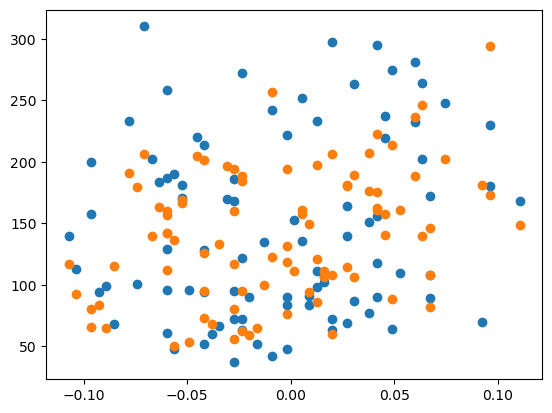

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)

plt.show

In [14]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

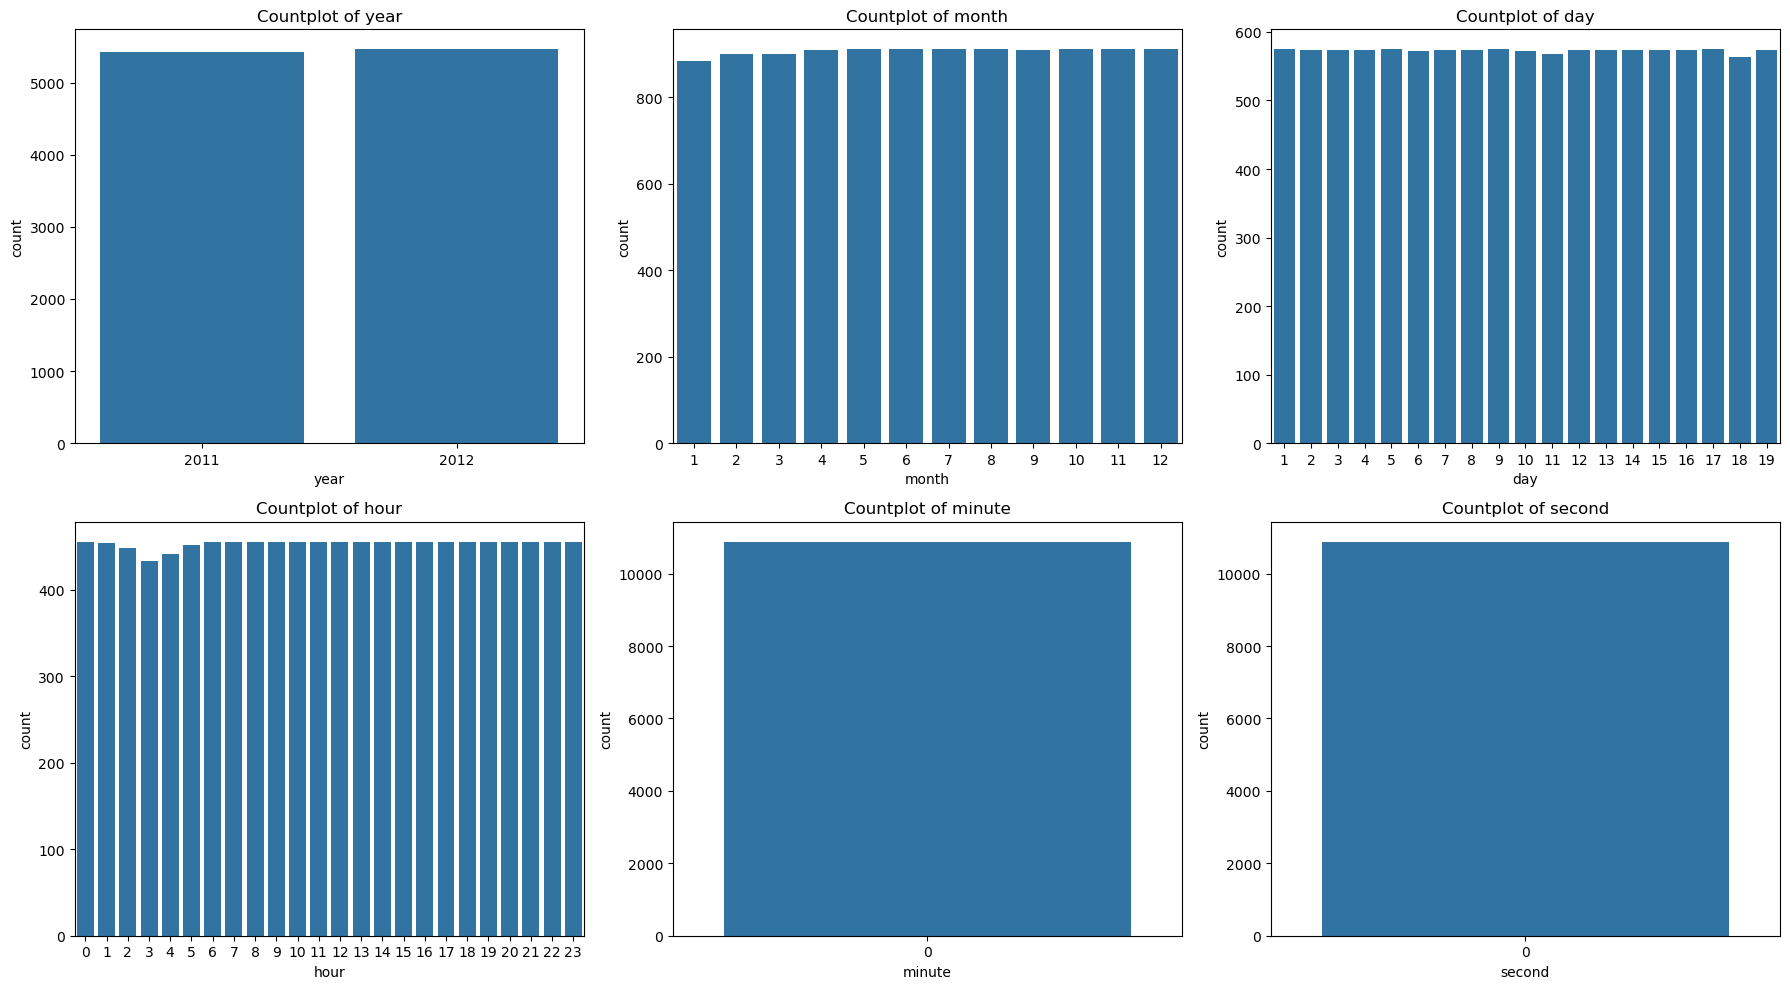

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year','month','day', 'hour', 'minute','second']
for ax, col in zip(axs.flatten(),cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

features = ['year','month','day', 'hour','temp','humidity','windspeed']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
from sklearn.ensemble import RandomForestRegressor

#Random forest model과 비교
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
rmse_rf = np.sqrt(mse_rf)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('Random Forest model MSE: ', mse_rf)
print('Random Forest model RMSE: ', rmse_rf)

MSE:  19961.901814435438
RMSE:  141.2865946027274
Random Forest model MSE:  6470.611937557392
Random Forest model RMSE:  80.44011398274739


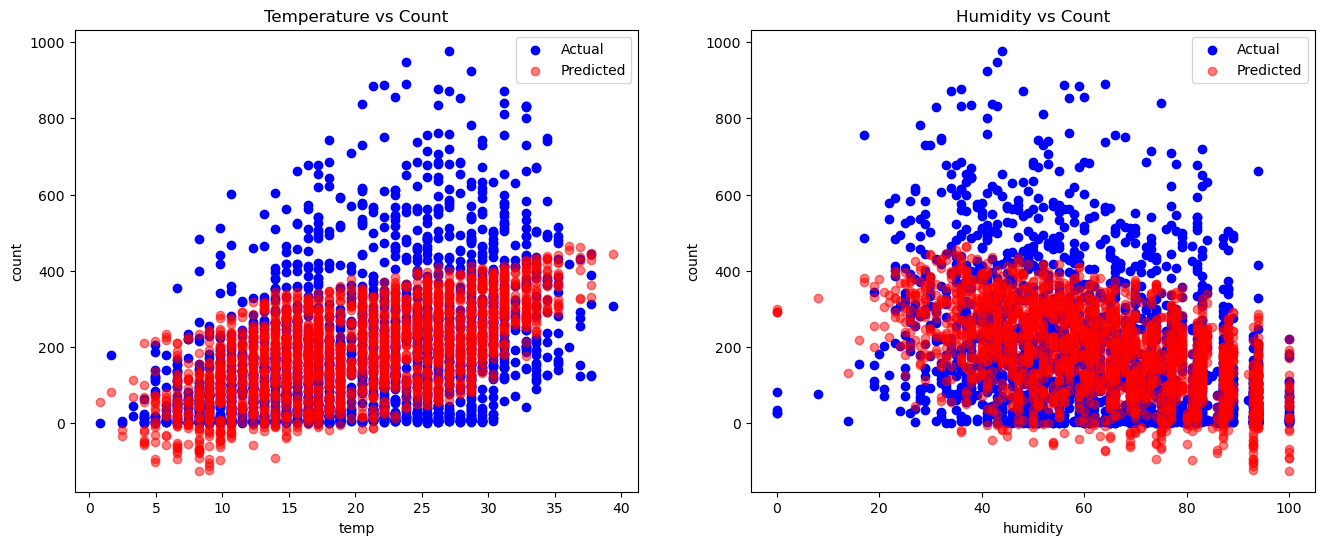

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [22]:
model_rf.feature_importances_

array([0.08535908, 0.07442584, 0.05099808, 0.54554046, 0.12737126,
       0.07726136, 0.03904392])

In [23]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

#feature importances 보기 위해 전체 학습. registered와 casual 의 합이 count임으로 빼고 계산
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute', 'second']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model_rf_all = RandomForestRegressor()
model_rf_all.fit(X_train_std, y_train)

y_pred_rf_all = model_rf_all.predict(X_test_std)
mse_rf_all = mean_squared_error(y_test, y_pred_rf_all)
rmse_rf_all = np.sqrt(mse_rf_all)

print('Random Forest model all features MSE: ', mse_rf_all)
print('Random Forest model all features RMSE: ', rmse_rf_all)

Random Forest model all features MSE:  1781.0233398530763
Random Forest model all features RMSE:  42.202172217233986


In [25]:
# minute과 second는 중요도 없음 registered와 casual은 중요도 높음
print(model_rf_all.feature_importances_)
best = mse_rf_all
best_features = []

[0.01058167 0.00219578 0.08546625 0.01460888 0.05685742 0.04958537
 0.0289613  0.00956786 0.0861997  0.04673558 0.01246366 0.59677653
 0.         0.        ]


In [26]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model_rf_select = RandomForestRegressor()
model_rf_select.fit(X_train_std, y_train)

y_pred_rf_select = model_rf_select.predict(X_test_std)
mse_rf_select = mean_squared_error(y_test, y_pred_rf_select)
rmse_rf_select = np.sqrt(mse_rf_select)

# feature importances가 작은 것 부터 feature를 재거하여 가장 좋은걸 기록으로 남김.
if mse_rf_select < best:
    best = mse_rf_select
    best_features = features

# Project 2 Result

print('Random Forest model selected features MSE: ', mse_rf_select)
print('Random Forest model selected features RMSE: ', rmse_rf_select)
print('best score : ', best)
print('best features: ', best_features)

Random Forest model selected features MSE:  1777.4002493112946
Random Forest model selected features RMSE:  42.1592249609892
best score :  1777.4002493112946
best features:  ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']


In [27]:
print(model_rf_select.feature_importances_)
print(model_rf_select.feature_importances_.min())

[0.00971344 0.00236874 0.08305607 0.01460511 0.05461107 0.05026007
 0.02967939 0.00944713 0.08527695 0.04949768 0.01249684 0.59898752]
0.002368738304136345


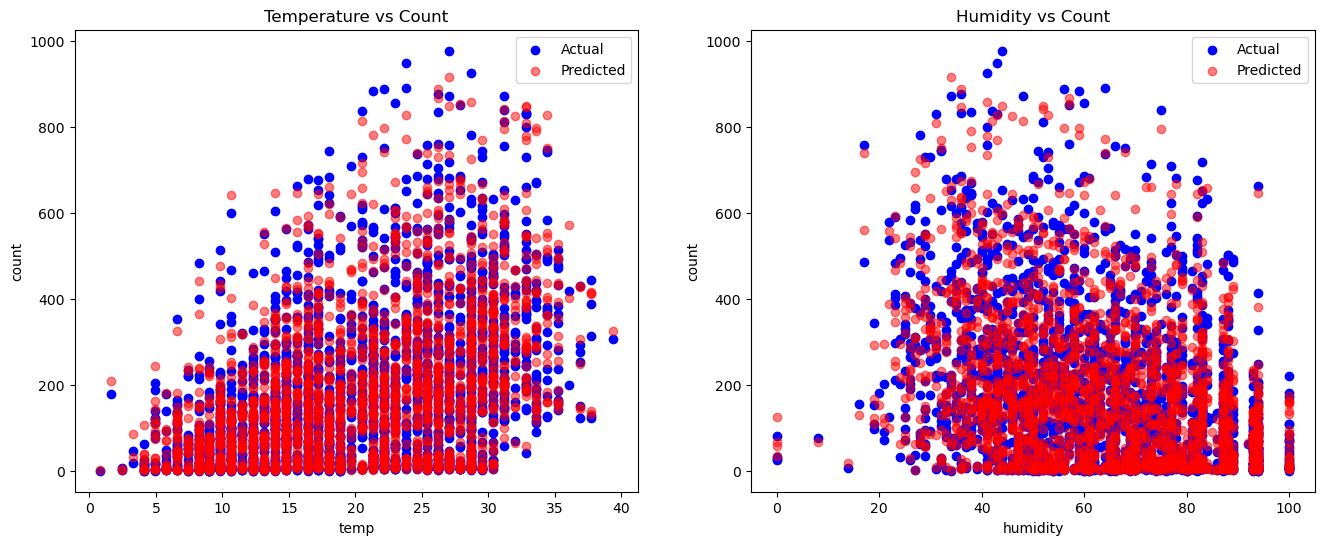

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [29]:
from sklearn.linear_model import LinearRegression

model_selected = LinearRegression()
model_selected.fit(X_train_std , y_train)

y_pred_selected = model_selected.predict(X_test_std)
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)

print('MSE feature selected : ', mse_selected)
print('RMSE feature selected : ', rmse_selected)

MSE feature selected :  19945.37005375383
RMSE feature selected :  141.22807813517053


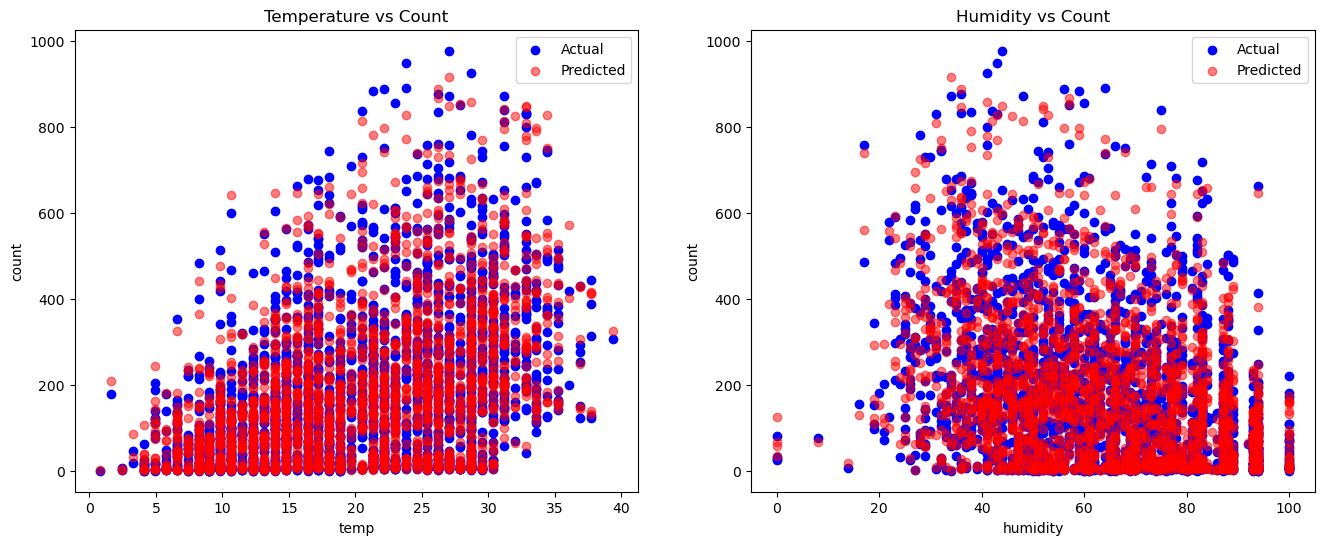

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

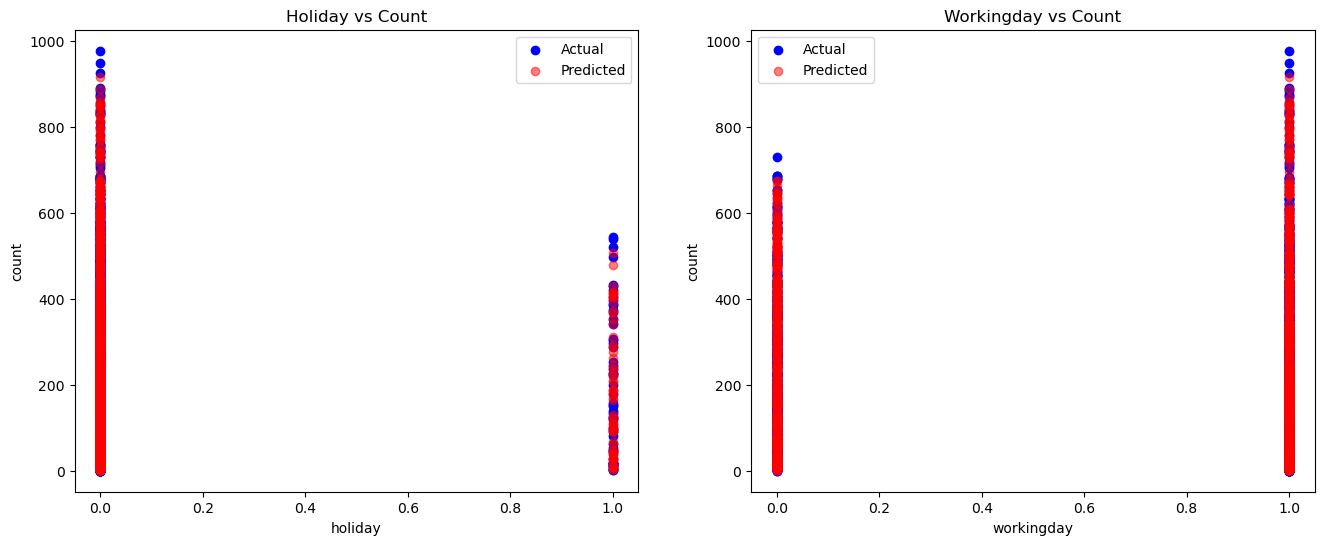

In [31]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['holiday'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['holiday'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('holiday')
axs[0].set_ylabel('count')
axs[0].set_title('Holiday vs Count')
axs[0].legend()

axs[1].scatter(X_test['workingday'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['workingday'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('workingday')
axs[1].set_ylabel('count')
axs[1].set_title('Workingday vs Count')
axs[1].legend()

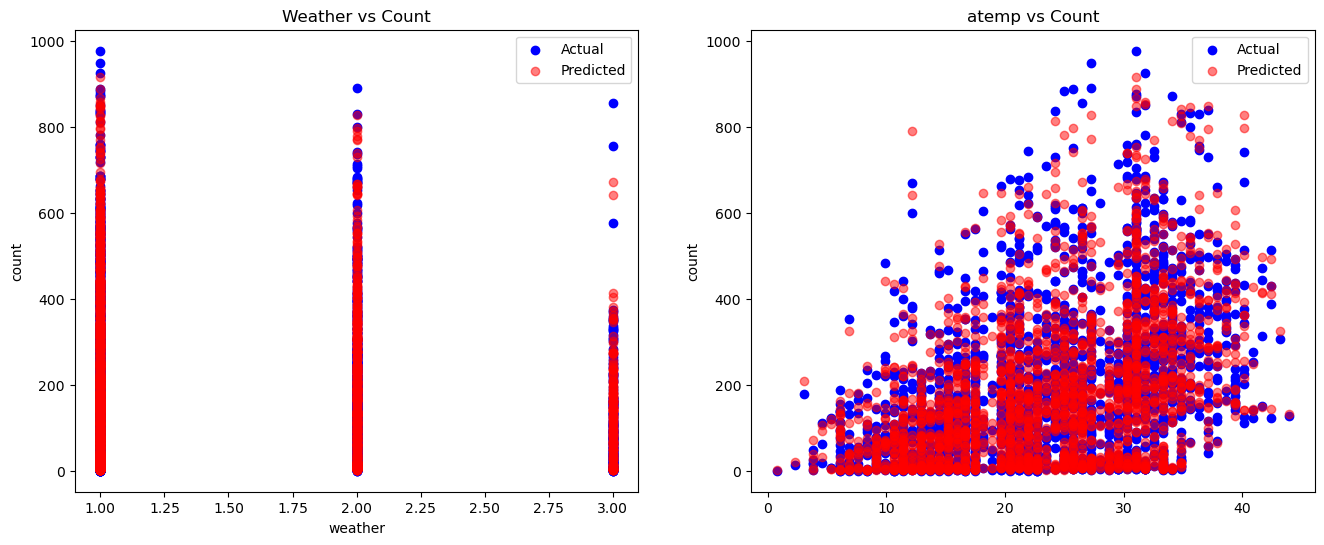

In [32]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['weather'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['weather'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('weather')
axs[0].set_ylabel('count')
axs[0].set_title('Weather vs Count')
axs[0].legend()

axs[1].scatter(X_test['atemp'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['atemp'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('atemp')
axs[1].set_ylabel('count')
axs[1].set_title('atemp vs Count')
axs[1].legend()

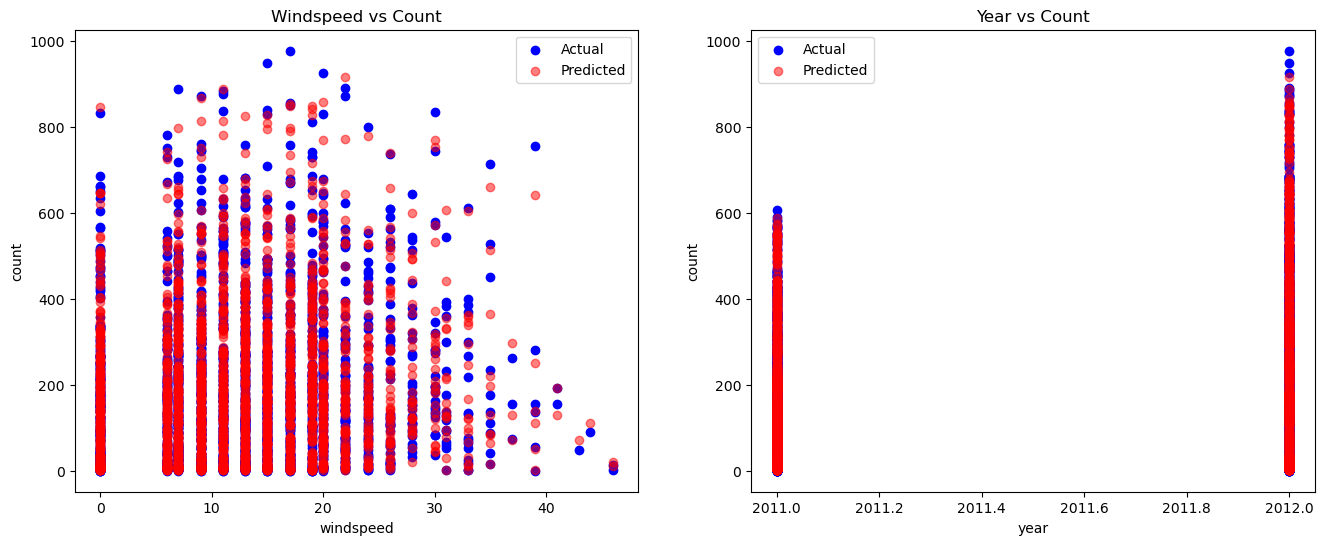

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['windspeed'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['windspeed'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('windspeed')
axs[0].set_ylabel('count')
axs[0].set_title('Windspeed vs Count')
axs[0].legend()

axs[1].scatter(X_test['year'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['year'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('year')
axs[1].set_ylabel('count')
axs[1].set_title('Year vs Count')
axs[1].legend()

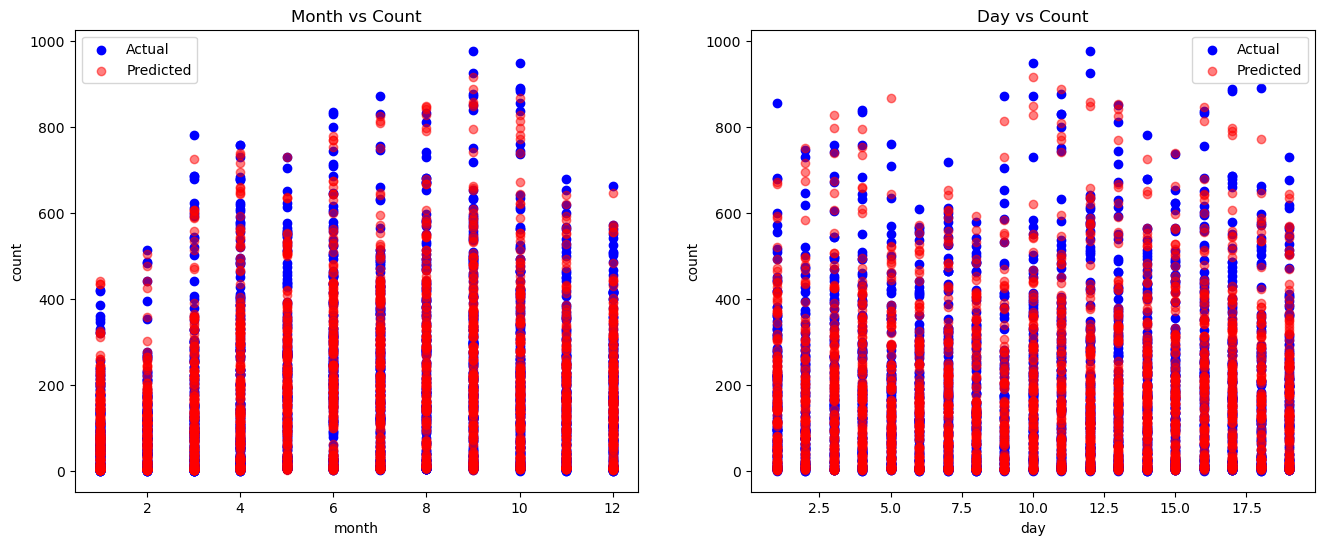

In [34]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['month'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['month'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('month')
axs[0].set_ylabel('count')
axs[0].set_title('Month vs Count')
axs[0].legend()

axs[1].scatter(X_test['day'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['day'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('day')
axs[1].set_ylabel('count')
axs[1].set_title('Day vs Count')
axs[1].legend()

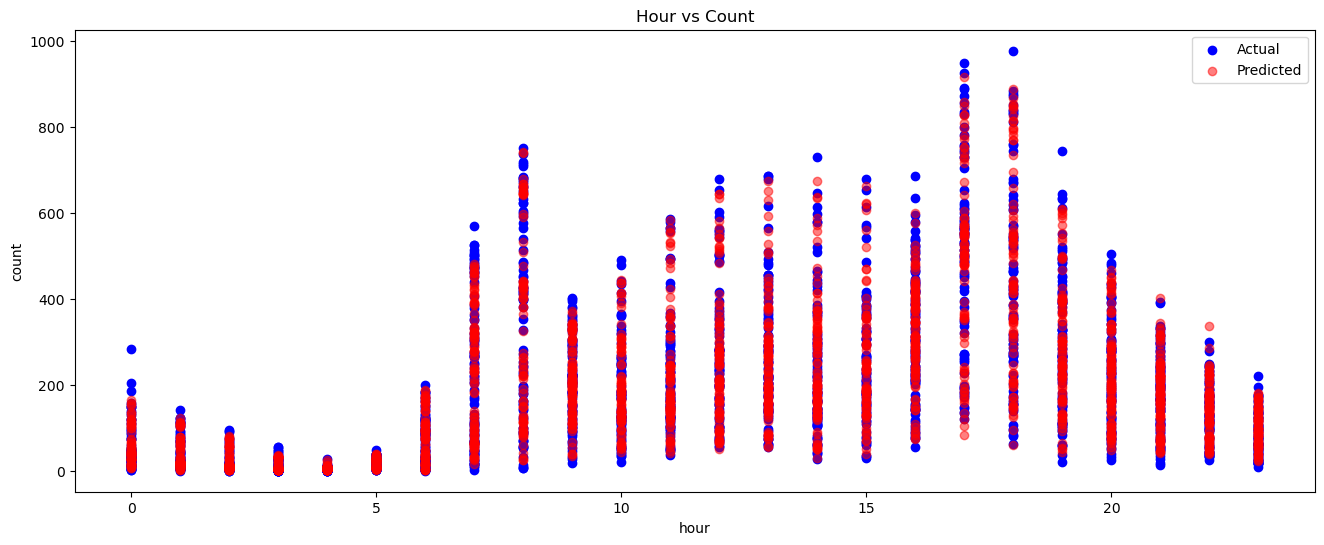

In [35]:
fig, axs = plt.subplots(1, 1, figsize = (16,6))

axs.scatter(X_test['hour'], y_test, color='blue', label='Actual')
axs.scatter(X_test['hour'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs.set_xlabel('hour')
axs.set_ylabel('count')
axs.set_title('Hour vs Count')
axs.legend()

# 실험 결과

Linear model 과 Random Forest model 비교 시 Random Forest model이 더 좋은 평가 지표가 나옴   

MSE:  19961.901814435438   
RMSE:  141.2865946027274   
Random Forest model MSE:  6483.506583516988   
Random Forest model RMSE:  80.52022468620531      

Random Forest 에서 feature important를 활용해 feature selection을 해봤더니 이전보다 좋은 지표가 나옴   

Random Forest model selected features MSE:  1804.1514300275483   
Random Forest model selected features RMSE:  42.47530376615979  

여기서 착안하여 Random Forest model 에서 중요한 features 는 Linear model 에서도 중요하다는 접근으로 생각하여   
Linear model에 중요한 feature만 적용시켜 보았더니 기존 Linear model 과 큰 차이는 없음  

MSE feature selected :  19945.37005375383   
RMSE feature selected :  141.22807813517053   

registered 와 casual이 count와 합 관계여서 이전에 실험 했을 때 linear model이 가장 낮게 나오는 현상이 있었지만 지금은 registered 와 casual이 있으면 안된다는 것을 알고 제거.   